In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split,GridSearchCV

In [3]:
df=pd.read_csv("collegePlace.csv")
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


## EDA

<AxesSubplot:xlabel='Gender', ylabel='count'>

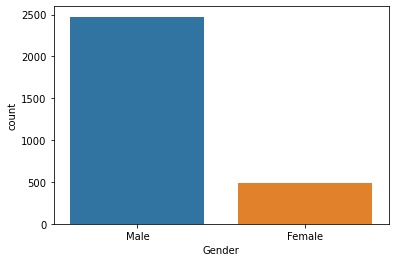

In [4]:
sns.countplot(df['Gender'])

Number of Males Are More than Female For Placements.

<AxesSubplot:xlabel='Stream', ylabel='count'>

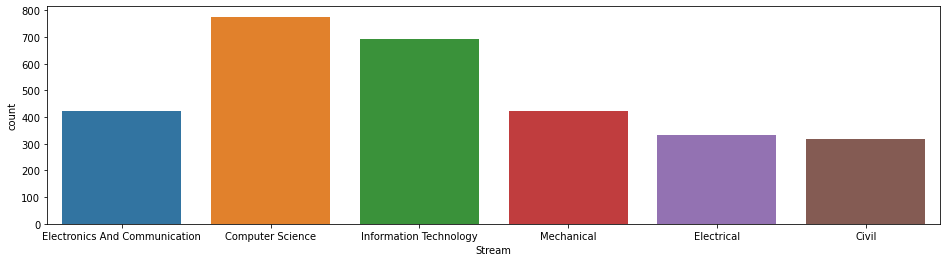

In [5]:
plt.figure(figsize=(16,4))
sns.countplot(df.Stream)

###### We can See that for placements Students From Computer Science And It are More than And Other Stream.

<AxesSubplot:xlabel='Stream'>

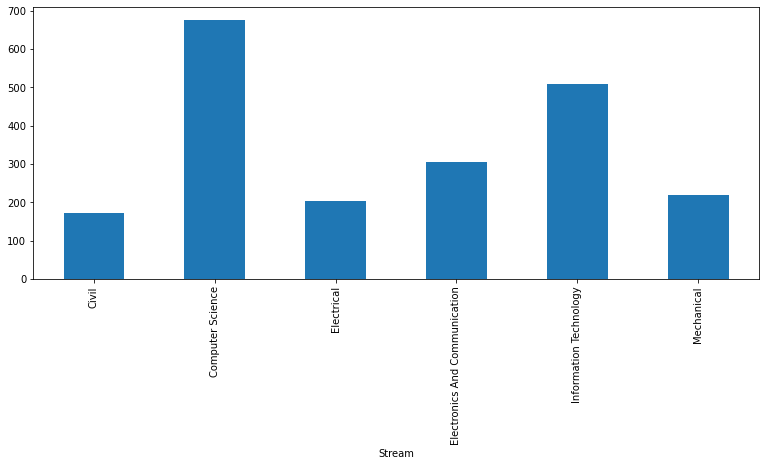

In [6]:
plt.figure(figsize=(13,5))
df.groupby('Stream')['Internships'].sum().plot(kind='bar')

###### From The Following Graph We can that that Students From Computer Science Has More Internships than Any Other Stream.

<AxesSubplot:xlabel='Stream'>

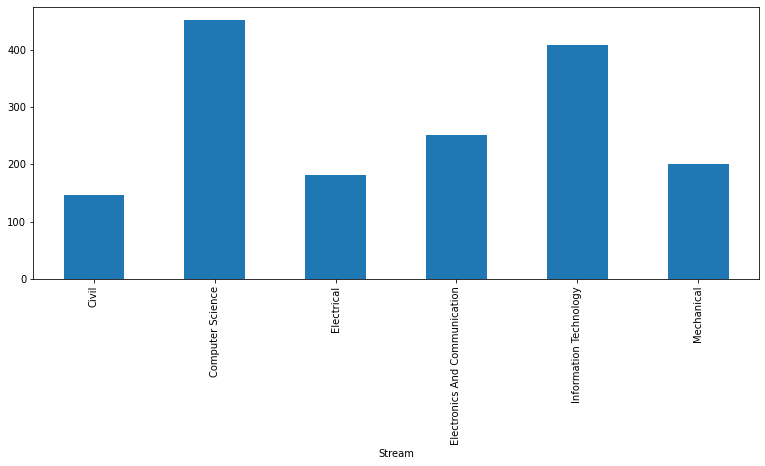

In [7]:
plt.figure(figsize=(13,5))
df.groupby('Stream')['PlacedOrNot'].sum().plot(kind='bar')

###### From The Graph We can that that Students From Computer Science and It Has More Chance of Getting Placed Than Any Other Steam.

## Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
lr = LabelEncoder()
df['gender'] = pd.DataFrame(lr.fit_transform(df[['Gender']]))
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,gender
0,22,Male,Electronics And Communication,1,8,1,1,1,1
1,21,Female,Computer Science,0,7,1,1,1,0
2,22,Female,Information Technology,1,6,0,0,1,0
3,21,Male,Information Technology,0,8,0,1,1,1
4,22,Male,Mechanical,0,8,1,0,1,1


In [10]:
df['stream'] = pd.DataFrame(lr.fit_transform(df['Stream']))

In [11]:
df2 = df.drop(['Gender','Stream'],axis=1)

In [12]:
X = df2.drop('PlacedOrNot',axis=1)
y = df2.PlacedOrNot

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

## Logistic Regression

In [14]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [15]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
print('Accuracy Score',accuracy_score(y_test,y_pred)*100)
#model has 76% Accuracy...

Accuracy Score 76.74157303370787


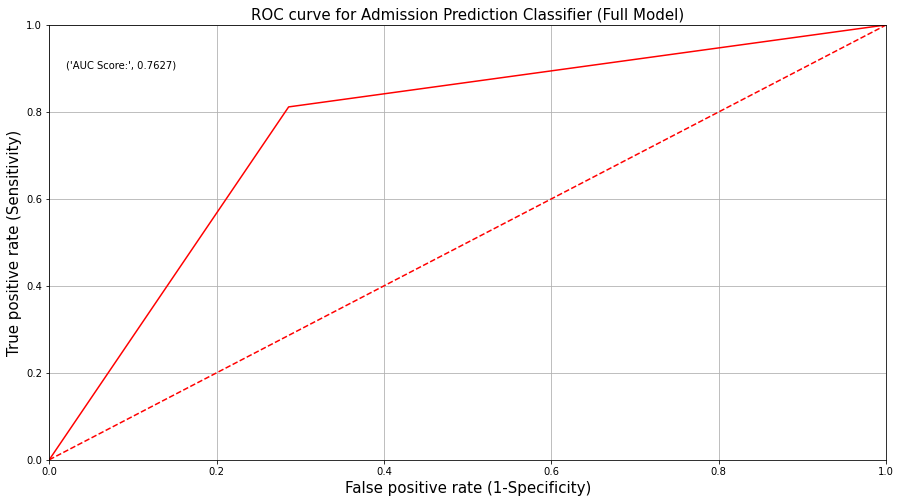

In [16]:
FP_rate,TP_rate,threshold=roc_curve(y_test,y_pred)

plt.figure(figsize=(15,8))
plt.plot(FP_rate,TP_rate,color='red')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))                               
plt.grid(True)
plt.show()

## Decision Tree:-

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
DT=DecisionTreeClassifier() 
DT_model_full = DT.fit(X_train,y_train) 
y_pred_test = DT_model_full.predict(X_test) 
print("Accuracy Score on Test dayta:\t",accuracy_score(y_test,y_pred_test))
y_pred_train = DT_model_full.predict(X_train) 
print("Accuracy Score on Train Data:\t",accuracy_score(y_train,y_pred_train))

Accuracy Score on Test dayta:	 0.8730337078651685
Accuracy Score on Train Data:	 0.9258188824662813


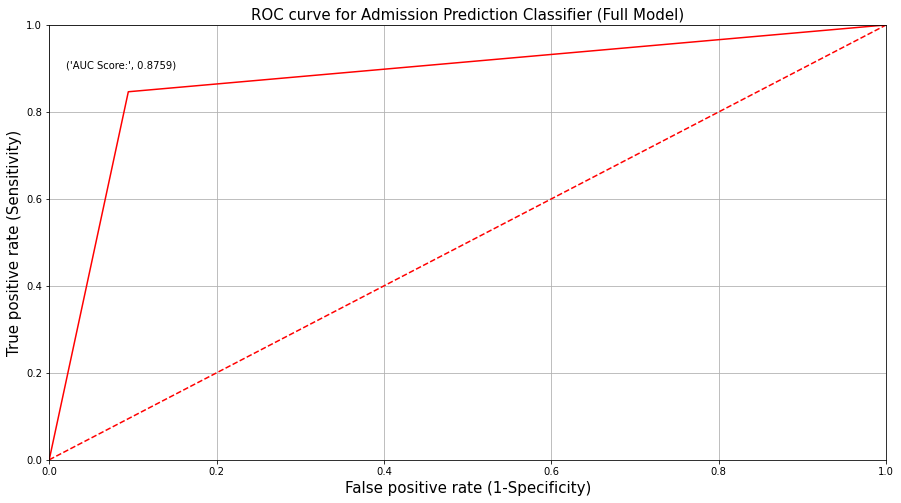

In [22]:
FP_rate,TP_rate,threshold=roc_curve(y_test,y_pred_test)

plt.figure(figsize=(15,8))
plt.plot(FP_rate,TP_rate,color='red')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_test),4)))                               
plt.grid(True)
plt.show()

In [20]:
X_train.head(2)

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,gender,stream
2375,19,1,8,1,0,1,5
93,22,2,7,0,0,0,4


## Lets Predict...

In [21]:
Val = [[30,0,8,0,0,1,5]]
print("Predicted VAlue:- ",DT_model_full.predict(Val) )

Predicted VAlue:-  [1]
